In [66]:
import os

# List all files in the Kaggle input directory
print(os.listdir("/kaggle/input/"))

['images', 'fashion-product-images-dataset', 'efficientnetb0-notop-h5']


In [67]:
import os

# List all files in your specific dataset folder
print(os.listdir("/kaggle/input/fashion-product-images-dataset/"))

['fashion-dataset']


In [68]:
print(os.listdir("/kaggle/input/fashion-product-images-dataset/fashion-dataset"))

['images.csv', 'images', 'styles.csv', 'styles', 'fashion-dataset']


In [69]:
import os
import pandas as pd

# Define the base directory
base_dir = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"

# Path to styles.csv
styles_path = os.path.join(base_dir, "styles.csv")

# Path to images directory
images_dir = os.path.join(base_dir, "images")

# Read styles.csv into a pandas DataFrame
styles_df = pd.read_csv(styles_path, on_bad_lines='skip')  # 'on_bad_lines' helps skip any problematic rows

# List files in the images directory (first few for example)
image_files = os.listdir(images_dir)[:5]  # Shows first 5 images

print("Styles DataFrame head:")
print(styles_df.head())

print("\nFirst few image files:")
print(image_files)

Styles DataFrame head:
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  

First few image files:
['31973.jpg', '30778.jpg', '19812.jpg', '22735.jpg', '38246.jpg']


In [70]:
styles_df.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [71]:
styles_df.shape

(44424, 10)

In [72]:
styles_df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [73]:
styles_df['baseColour'] = styles_df['baseColour'].fillna('Unknown')
styles_df['season'] = styles_df['season'].fillna('Unknown')
styles_df['year'] = styles_df['year'].fillna(styles_df['year'].median())
styles_df['usage'] = styles_df['usage'].fillna('Casual')
styles_df['productDisplayName'] = styles_df['productDisplayName'].fillna('Unnamed Product')

In [74]:
styles_df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [75]:
styles_df.drop_duplicates(inplace=True)

In [76]:
if 'year' in styles_df.columns:
    # Convert to numeric and handle NaNs in one step
    styles_df['year'] = pd.to_numeric(styles_df['year'], errors='coerce')
    
    # Calculate median first to avoid chained assignment
    year_median = styles_df['year'].median()
    
    # Fill and convert type in single assignment
    styles_df['year'] = styles_df['year'].fillna(year_median).astype(int)

In [77]:
styles_df.reset_index(drop=True, inplace=True)

In [78]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt


In [79]:
styles_df.shape

(44424, 10)

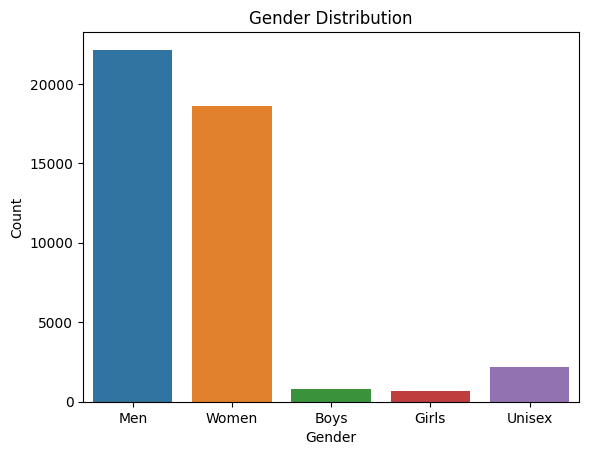

In [80]:
##EDA
import seaborn as sns
import matplotlib.pyplot as plt
# Plot 1: Gender distribution
sns.countplot(x='gender', data=styles_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

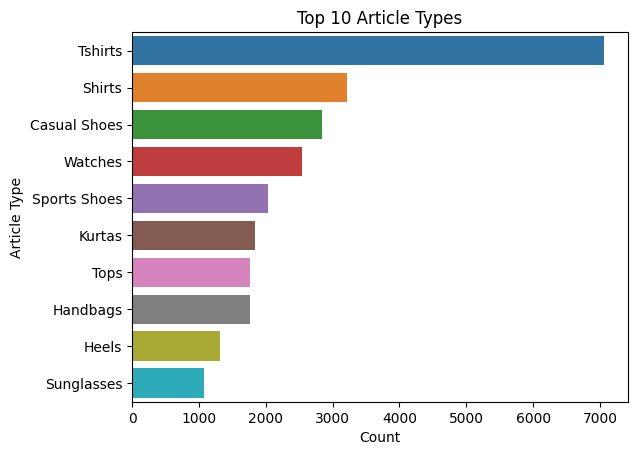

In [81]:
# Plot2: Article Type (Top 10)
top_articles = styles_df['articleType'].value_counts().nlargest(10).index
sns.countplot(data=styles_df[styles_df['articleType'].isin(top_articles)], y='articleType', order=top_articles)
plt.title('Top 10 Article Types')
plt.xlabel('Count')
plt.ylabel('Article Type')
plt.show()

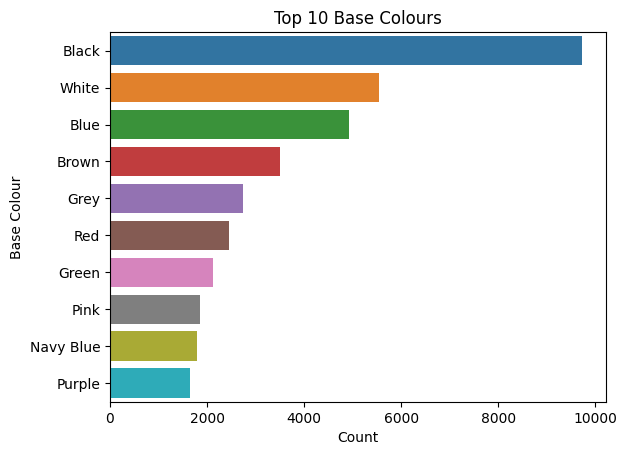

In [82]:
# Plot 3: Base colour distribution (Top 10)
top_colors = styles_df['baseColour'].value_counts().nlargest(10).index
sns.countplot(data=styles_df[styles_df['baseColour'].isin(top_colors)], y='baseColour', order=top_colors)
plt.title('Top 10 Base Colours')
plt.xlabel('Count')
plt.ylabel('Base Colour')
plt.show()

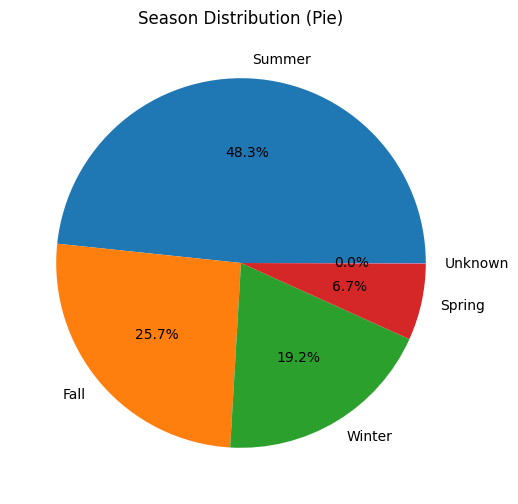

In [83]:
# Plot 4: Pie chart for season
styles_df['season'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Season Distribution (Pie)')
plt.ylabel('')
plt.show()

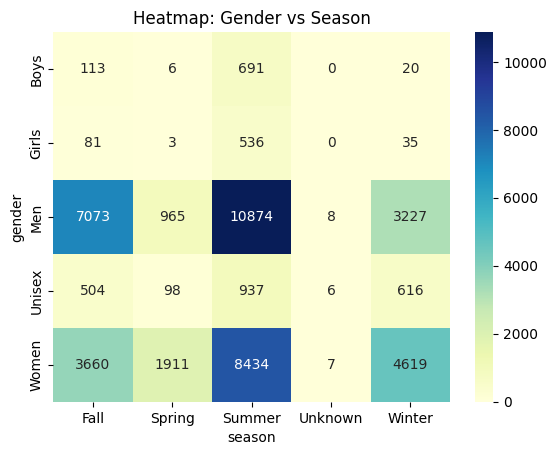

In [84]:
# Plot 5: Heatmap - Gender vs Season
pivot_table = pd.crosstab(styles_df['gender'], styles_df['season'])
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap: Gender vs Season')
plt.show()


In [85]:
# Drop duplicates (if any)
styles_df.drop_duplicates(subset=['id'], inplace=True)
styles_df['id'] = styles_df['id'].astype(str)
styles_df['image_path'] = styles_df['id'].apply(
    lambda x: f"/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/{x}.jpg"
)
styles_df = styles_df[styles_df['image_path'].apply(os.path.exists)]

In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in ['baseColour', 'articleType', 'season', 'gender']:
    le = LabelEncoder()
    styles_df[col] = le.fit_transform(styles_df[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} classes")

baseColour: 47 classes
articleType: 142 classes
season: 5 classes
gender: 5 classes


In [88]:
##Train-Validation Split
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(styles_df, test_size=0.2, random_state=42)

In [105]:
##Create Data Generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

# Validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Batch generators
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

train_gen = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col=['baseColour', 'articleType', 'season', 'gender'],
    target_size=IMG_SIZE,
    class_mode='multi_output',
    batch_size=BATCH_SIZE
)

val_gen = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col=['baseColour', 'articleType', 'season', 'gender'],
    target_size=IMG_SIZE,
    class_mode='multi_output',
    batch_size=BATCH_SIZE
)

def wrap_generator(generator):
    while True:
        x, y_list = next(generator)
        yield x, {
            'color': y_list[0],
            'article': y_list[1],
            'season': y_list[2],
            'gender': y_list[3]
        }

train_gen_wrapped = wrap_generator(train_gen)
val_gen_wrapped = wrap_generator(val_gen)





Found 35535 validated image filenames.
Found 8884 validated image filenames.


In [107]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

# Path to the pre-downloaded weights
EFFNET_WEIGHTS_PATH = '/kaggle/input/efficientnetb0-notop-h5/efficientnetb0_notop.h5'

# First, verify your actual class counts
print("Actual number of classes:")
print(f"Colors: {len(np.unique(styles_df['baseColour']))}")
print(f"Articles: {len(np.unique(styles_df['articleType']))}")
print(f"Seasons: {len(np.unique(styles_df['season']))}")
print(f"Genders: {len(np.unique(styles_df['gender']))}")

# Load model with local weights
base_model = EfficientNetB0(
    weights=EFFNET_WEIGHTS_PATH,
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = True  # Fine-tuning

# Dynamic output sizing based on your actual data
x = GlobalAveragePooling2D()(base_model.output)
outputs = [
    Dense(len(np.unique(styles_df['baseColour'])), activation='softmax', name='color')(x),
    Dense(len(np.unique(styles_df['articleType'])), activation='softmax', name='article')(x),
    Dense(len(np.unique(styles_df['season'])), activation='softmax', name='season')(x),
    Dense(len(np.unique(styles_df['gender'])), activation='softmax', name='gender')(x)
]

model = Model(inputs=base_model.input, outputs=outputs)
model.summary()

Actual number of classes:
Colors: 47
Articles: 142
Seasons: 5
Genders: 5


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_9         │ (None, 224, 224,  │          0 │ input_layer_7[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_7     │ (None, 224, 224,  │          7 │ rescaling_9[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization_7[… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,304,490 (16.42 MB)

 Trainable params: 4,262,467 (16.26 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [109]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseTopKCategoricalAccuracy

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'color': 'sparse_categorical_crossentropy',
        'article': 'sparse_categorical_crossentropy',
        'season': 'sparse_categorical_crossentropy',
        'gender': 'sparse_categorical_crossentropy'
    },
    loss_weights={
        'color': 1.0,
        'article': 1.0,
        'season': 0.6,
        'gender': 0.6
    },
    metrics={
        'color': [
            'accuracy',
            SparseTopKCategoricalAccuracy(k=3, name='top3_accuracy')
        ],
        'article': [
            'accuracy',
            SparseTopKCategoricalAccuracy(k=5, name='top5_accuracy')
        ],
        'season': ['accuracy'],
        'gender': ['accuracy']
    }
)

In [110]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3),
    ModelCheckpoint('best_model.h5', monitor='val_color_loss', save_best_only=True)
]

history = model.fit(
    train_gen_wrapped,
    validation_data=val_gen_wrapped,
    epochs=10,  # Fixed to 10 epochs
    steps_per_epoch=len(train_df)//BATCH_SIZE,
    validation_steps=len(val_df)//BATCH_SIZE,
    callbacks=callbacks,
    verbose=1  # Shows progress bar
)

Epoch 1/10


I0000 00:00:1752996154.253976     100 service.cc:148] XLA service 0x79e1c0002550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752996154.254837     100 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752996154.413986     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
E0000 00:00:1752996194.452903     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752996194.641299     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752996195.107258     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup ex

1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1514s 1s/step - article_accuracy: 0.6770 - article_loss: 1.2904 - article_top5_accuracy: 0.8878 - color_accuracy: 0.5388 - color_loss: 1.6655 - color_top3_accuracy: 0.7677 - gender_accuracy: 0.7984 - gender_loss: 0.5385 - loss: 3.7980 - season_accuracy: 0.6238 - season_loss: 0.8651 - val_article_accuracy: 0.0782 - val_article_loss: 950.4037 - val_article_top5_accuracy: 0.9879 - val_color_accuracy: 0.1989 - val_color_loss: 737.9620 - val_color_top3_accuracy: 0.9658 - val_gender_accuracy: 0.5103 - val_gender_loss: 350.5781 - val_loss: 2079.7083 - val_season_accuracy: 0.4765 - val_season_loss: 301.6612 - learning_rate: 0.0010
Epoch 2/10


E0000 00:00:1752997647.790940      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752997647.975713      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752997648.401908      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752997648.606547      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1752997648.951186      99 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:0

1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1140s 1000ms/step - article_accuracy: 0.8350 - article_loss: 0.5038 - article_top5_accuracy: 0.9863 - color_accuracy: 0.6605 - color_loss: 1.1180 - color_top3_accuracy: 0.8796 - gender_accuracy: 0.8793 - gender_loss: 0.3334 - loss: 2.2455 - season_accuracy: 0.7007 - season_loss: 0.7112 - val_article_accuracy: 0.0029 - val_article_loss: 6.7259 - val_article_top5_accuracy: 0.0183 - val_color_accuracy: 0.0103 - val_color_loss: 3.4741 - val_color_top3_accuracy: 0.1657 - val_gender_accuracy: 0.5074 - val_gender_loss: 1.1392 - val_loss: 11.7423 - val_season_accuracy: 0.1388 - val_season_loss: 1.4313 - learning_rate: 0.0010
Epoch 3/10
1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1056s 952ms/step - article_accuracy: 0.8671 - article_loss: 0.4018 - article_top5_accuracy: 0.9915 - color_accuracy: 0.6849 - color_loss: 1.0174 - color_top3_accuracy: 0.8985 - gender_accuracy: 0.8931 - gender_loss: 0.2946 - loss: 1.9909 - season_accuracy: 0.7268 - season_loss: 0.6642 - val_article_ac

In [111]:
model.save('final_fashion_model.h5')  # Saves architecture + weights

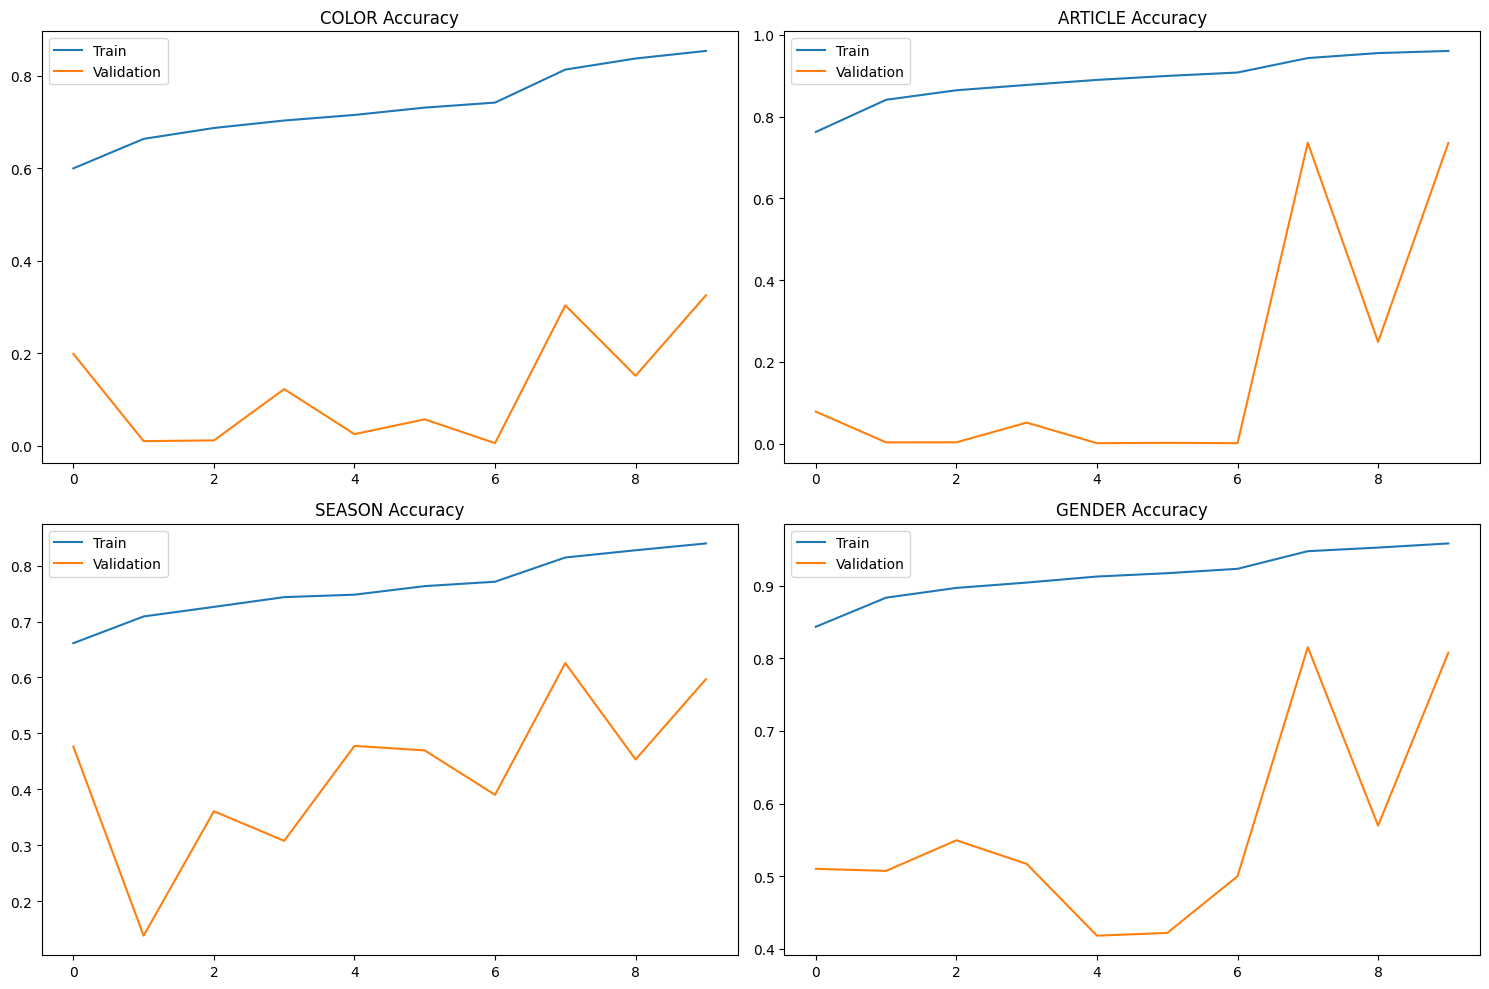

In [112]:
import matplotlib.pyplot as plt

# Plot accuracy for all tasks
tasks = ['color', 'article', 'season', 'gender']
plt.figure(figsize=(15, 10))

for i, task in enumerate(tasks):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[f'{task}_accuracy'], label='Train')
    plt.plot(history.history[f'val_{task}_accuracy'], label='Validation')
    plt.title(f'{task.upper()} Accuracy')
    plt.legend()
plt.tight_layout()
plt.show()

In [116]:
from sklearn.metrics import classification_report
import numpy as np

def evaluate_model(generator, df, label_encoders):
    tasks = ['baseColour', 'articleType', 'season', 'gender']
    
    y_true = {task: [] for task in tasks}
    y_pred = {task: [] for task in tasks}
    
    for _ in range(len(df)//BATCH_SIZE):
        x, y_dict = next(generator)
        preds = model.predict(x, verbose=0)
        
        y = {
            'baseColour': y_dict['color'],
            'articleType': y_dict['article'],
            'season': y_dict['season'],
            'gender': y_dict['gender']
        }
        
        for i, task in enumerate(tasks):
            y_true[task].extend(y[task])
            y_pred[task].extend(np.argmax(preds[i], axis=1))
    
    for task in tasks:
        print(f"\n{task.upper()} Report:")
        # Get the actual classes present in y_true and y_pred
        present_classes = set(y_true[task]) | set(y_pred[task])
        class_names = [label_encoders[task].classes_[c] for c in sorted(present_classes)]
        
        print(classification_report(
            y_true[task],
            y_pred[task],
            labels=sorted(present_classes),
            target_names=class_names,
            zero_division=0
        ))

print("Training Set Evaluation:")
evaluate_model(train_gen_wrapped, train_df, label_encoders)

print("\nValidation Set Evaluation:")
evaluate_model(val_gen_wrapped, val_df, label_encoders)

Training Set Evaluation:

BASECOLOUR Report:
                   precision    recall  f1-score   support

            Beige       0.03      0.02      0.02       591
            Black       0.62      0.45      0.52      7757
             Blue       0.58      0.51      0.54      3955
           Bronze       0.00      0.00      0.00        77
            Brown       0.23      0.78      0.35      2838
         Burgundy       0.00      0.00      0.00        34
         Charcoal       0.00      0.00      0.00       177
     Coffee Brown       0.00      0.00      0.00        28
           Copper       0.14      0.05      0.08        59
            Cream       0.12      0.01      0.01       318
Fluorescent Green       1.00      0.25      0.40         4
             Gold       0.20      0.45      0.27       491
            Green       0.43      0.77      0.55      1710
             Grey       0.26      0.01      0.02      2176
     Grey Melange       0.00      0.00      0.00       110
          


🔍 Analyzing Screenshot 2025-07-20 153615.png:


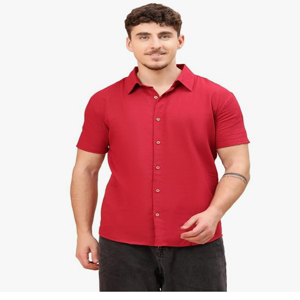

COLOR: Red
ARTICLE: Shirts
SEASON: Fall
GENDER: Men

🔍 Analyzing Screenshot 2025-07-20 155006.png:


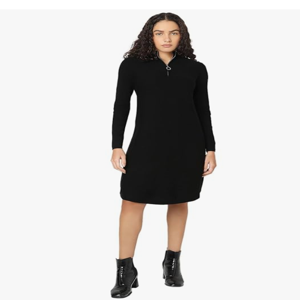

COLOR: Brown
ARTICLE: Skirts
SEASON: Summer
GENDER: Women

🔍 Analyzing Screenshot 2025-07-20 155057.png:


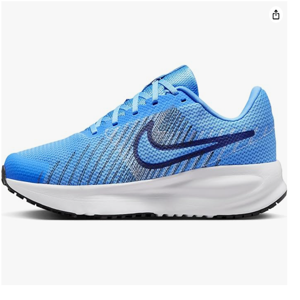

COLOR: Grey
ARTICLE: Sports Shoes
SEASON: Summer
GENDER: Women


In [118]:
from PIL import Image
import numpy as np
from IPython.display import display

def predict_fashion(image_path):
    """Predict fashion attributes for a single image"""
    img = Image.open(image_path).convert('RGB').resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    preds = model.predict(img_array, verbose=0)
    return {
        'color': label_encoders['baseColour'].inverse_transform([np.argmax(preds[0])])[0],
        'article': label_encoders['articleType'].inverse_transform([np.argmax(preds[1])])[0],
        'season': label_encoders['season'].inverse_transform([np.argmax(preds[2])])[0],
        'gender': label_encoders['gender'].inverse_transform([np.argmax(preds[3])])[0]
    }

# List of your 4 test images (update these paths)
test_images = [
    '/kaggle/input/test-images/Screenshot 2025-07-20 153615.png',
    '/kaggle/input/test-images/Screenshot 2025-07-20 155006.png',
    '/kaggle/input/test-images/Screenshot 2025-07-20 155057.png',
    
]

# Test each image
for img_path in test_images:
    try:
        print(f"\n🔍 Analyzing {img_path.split('/')[-1]}:")
        
        # Display the image
        display(Image.open(img_path).resize((300, 300)))
        
        # Get and show predictions
        predictions = predict_fashion(img_path)
        for attr, val in predictions.items():
            print(f"{attr.upper()}: {val}")
            
    except Exception as e:
        print(f"❌ Error processing {img_path}: {str(e)}")

In [120]:
import pickle
import json

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save metadata
metadata = {
    'image_size': (224, 224),
    'classes': {
        'baseColour': list(label_encoders['baseColour'].classes_),
        'articleType': list(label_encoders['articleType'].classes_),
        'season': list(label_encoders['season'].classes_),
        'gender': list(label_encoders['gender'].classes_)
    }
}
with open('metadata.json', 'w') as f:
    json.dump(metadata, f)

In [123]:
import json
metadata = {
    'image_size': (224, 224),
    'classes': {
        'baseColour': list(label_encoders['baseColour'].classes_),
        'articleType': list(label_encoders['articleType'].classes_),
        'season': list(label_encoders['season'].classes_),
        'gender': list(label_encoders['gender'].classes_)
    }
}
with open('metadata.json', 'w') as f:
    json.dump(metadata, f)